<a href="https://colab.research.google.com/github/varmapriya/Machine-Learning/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

#### install the required packages

In [1]:
%pip install yellowbrick plotly nbformat

## Read the Dataset

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
import pandas as pd
df = pd.read_csv('/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Categorize similar customers based on Age,Income and Spend

In [6]:
X = df[['Age' , 'Income' , 'Spending']]
X.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40




```
# This is formatted as code
```



## Step 2 : Apply preprocessing on X


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [14]:
num_pipe = Pipeline([('impute' , SimpleImputer(strategy='median')),
                           ('scaler' , StandardScaler())]).set_output(transform = 'pandas')

In [15]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980



## Step 3: Find out optimum number of clusters using elbow method

In [16]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

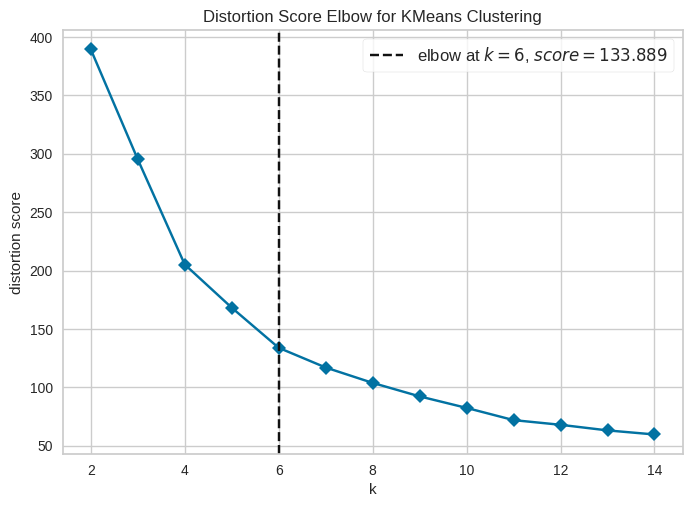

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
Visualizer = KElbowVisualizer(KMeans(),
                              k=(2,15),
                              timings = False)
Visualizer.fit(X_pre)
Visualizer.show()

## Create KMeans algorithm at k=6 as elbow is found at k=6 from above graph

In [18]:
model1 = KMeans(n_clusters=6)
label1 = model1.fit_predict(X_pre)

In [19]:
label1


array([3, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 5,
       4, 3, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 5, 5, 1, 1, 5, 1, 1, 5, 1, 1, 5,
       5, 1, 1, 5, 1, 5, 5, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 5, 5, 5, 5, 1, 1, 1, 1, 5, 5, 5, 0, 5, 0, 2, 0, 2, 0, 2, 0,
       5, 0, 2, 0, 2, 0, 2, 0, 2, 0, 5, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [20]:
X2 = X.copy()
X2

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [22]:
X2['Label1']=label1
X2

,Age,Income,Spending,Label1
0,19,15,39,3
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4
...,...,...,...,...
195,35,120,79,0
196,45,126,28,2
197,32,126,74,0
198,32,137,18,2


In [23]:
X2[X2['Label1']==0]

,Age,Income,Spending,Label1
123,39,69,91,0
125,31,70,77,0
127,40,71,95,0
129,38,71,75,0
131,39,71,75,0
133,31,72,71,0
135,29,73,88,0
137,32,73,73,0
139,35,74,72,0
141,32,75,93,0


In [24]:
for i in range(6):
  print(f'Cluster number {i}')
  print(X2[X2['Label1']==i])
  print('\n=================================================\n')

Cluster number 0
     Age  Income  Spending  Label1
123   39      69        91       0
125   31      70        77       0
127   40      71        95       0
129   38      71        75       0
131   39      71        75       0
133   31      72        71       0
135   29      73        88       0
137   32      73        73       0
139   35      74        72       0
141   32      75        93       0
143   32      76        87       0
145   28      77        97       0
147   32      77        74       0
149   34      78        90       0
151   39      78        88       0
153   38      78        76       0
155   27      78        89       0
157   30      78        78       0
159   30      78        73       0
161   29      79        83       0
163   31      81        93       0
165   36      85        75       0
167   33      86        95       0
169   32      87        63       0
171   28      87        75       0
173   36      87        92       0
175   30      88        86       0
177

In [25]:
cent1 = X2.groupby(by='Label1').mean()

In [26]:
cent1


,Age,Income,Spending
Label1,,,
0,32.692308,86.538462,82.128205
1,56.333333,54.266667,49.066667
2,41.264706,88.500000,16.764706
3,25.000000,25.260870,77.608696
4,45.523810,26.285714,19.380952
5,27.000000,56.657895,49.131579



# Visualize above with plotly

In [27]:
import plotly.express as px
fig1 = px.scatter_3d(data_frame=X2,
                     x='Age',
                     y='Income',
                     z='Spending',
                     color='Label1')
fig1.show()

# KMeans clustering completed


# 2. Agglomerative CLustering (Hierarchial clustering)

In [28]:
X_pre

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [29]:
from sklearn.cluster import AgglomerativeClustering
model2 = AgglomerativeClustering(n_clusters=6)
label2 = model2.fit_predict(X_pre)

In [30]:
label2

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 4, 0,
       4, 5, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [31]:
X3 = X2.copy()
X3

,Age,Income,Spending,Label1
0,19,15,39,3
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4
...,...,...,...,...
195,35,120,79,0
196,45,126,28,2
197,32,126,74,0
198,32,137,18,2


In [32]:
X3['Label2']=label2
X3

,Age,Income,Spending,Label1,Label2
0,19,15,39,3,4
1,21,15,81,3,5
2,20,16,6,4,4
3,23,16,77,3,5
4,31,17,40,4,4
...,...,...,...,...,...
195,35,120,79,0,2
196,45,126,28,2,3
197,32,126,74,0,2
198,32,137,18,2,3


In [33]:
for i in range(6):
  print(f'Cluster number: {i}\n')
  display(X3[X3['Label2']==i])
  print('\n========================================================\n')

Cluster number: 0



,Age,Income,Spending,Label1,Label2
27,35,28,61,3,0
43,31,39,61,5,0
47,27,40,47,5,0
48,29,40,42,5,0
49,31,40,42,5,0
51,33,42,60,5,0
52,31,43,54,5,0
58,27,46,51,5,0
61,19,46,55,5,0
65,18,48,59,5,0




Cluster number: 1



,Age,Income,Spending,Label1,Label2
40,65,38,35,1,1
46,50,40,55,1,1
50,49,42,52,1,1
53,59,43,60,1,1
54,50,43,45,1,1
55,47,43,41,1,1
56,51,44,50,1,1
57,69,44,46,1,1
59,53,46,46,1,1
60,70,46,56,1,1




Cluster number: 2



,Age,Income,Spending,Label1,Label2
123,39,69,91,0,2
125,31,70,77,0,2
127,40,71,95,0,2
129,38,71,75,0,2
131,39,71,75,0,2
133,31,72,71,0,2
135,29,73,88,0,2
137,32,73,73,0,2
139,35,74,72,0,2
141,32,75,93,0,2




Cluster number: 3



,Age,Income,Spending,Label1,Label2
128,59,71,11,2,3
130,47,71,9,2,3
136,44,73,7,2,3
140,57,75,5,2,3
148,34,78,22,2,3
150,43,78,17,2,3
152,44,78,20,2,3
154,47,78,16,2,3
156,37,78,1,2,3
158,34,78,1,2,3




Cluster number: 4



,Age,Income,Spending,Label1,Label2
0,19,15,39,3,4
2,20,16,6,4,4
4,31,17,40,4,4
6,35,18,6,4,4
8,64,19,3,4,4
10,67,19,14,4,4
12,58,20,15,4,4
14,37,20,13,4,4
16,35,21,35,4,4
18,52,23,29,4,4




Cluster number: 5



,Age,Income,Spending,Label1,Label2
1,21,15,81,3,5
3,23,16,77,3,5
5,22,17,76,3,5
7,23,18,94,3,5
9,30,19,72,3,5
11,35,19,99,3,5
13,24,20,77,3,5
15,22,20,79,3,5
17,20,21,66,3,5
19,35,23,98,3,5


In [37]:
fig2 = px.scatter_3d(data_frame=X3,
                     x='Age',
                     y='Income',
                     z='Spending',
                     color='Label2')
fig2.show()